Assignment:
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:

Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6?

Assume the following:

There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).
Channel mix, targeting, and efficiency are outside the scope of this exercise.
There may be data provided that is not useful in your end presentation

In [1]:
import pandas as pd

In [4]:
client_data = pd.read_csv("client_data.csv")
print("Client data shape", client_data.shape)
client_data.head()

Client data shape (46347, 4)


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [5]:
deposit_data = pd.read_csv("deposit_data.csv")
print("Deposit data shape", deposit_data.shape)
deposit_data.head()

Deposit data shape (480394, 5)


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [6]:
calendar_data = pd.read_csv("calendar_data.csv")
print("Calendar data shape", calendar_data.shape)
calendar_data.head()

Calendar data shape (153, 2)


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


Merging

In [7]:
df = client_data.merge(deposit_data, on="client_id")

In [8]:
df = df.merge(calendar_data, left_on="deposit_date", right_on="gregorian_date", copy=False)

In [9]:
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2
...,...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,2019-07-20,Month 2


In [12]:
df["client_residence_status"].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [10]:
df.drop(columns="gregorian_date", inplace=True)
df

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2
...,...,...,...,...,...,...,...,...,...
480389,495905820523476,West,Own,80,Actual Deposit,920.0,Monthly,2019-07-20,Month 2
480390,639239952445612,Northeast,Own,80,Scheduled Deposit,224.0,Monthly,2019-07-20,Month 2
480391,639239952445612,Northeast,Own,80,Actual Deposit,224.0,Monthly,2019-07-20,Month 2
480392,585677614443848,West,Own,80,Scheduled Deposit,438.0,Monthly,2019-07-20,Month 2


In [11]:
df["client_geographical_region"].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [13]:
df["client_age"].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

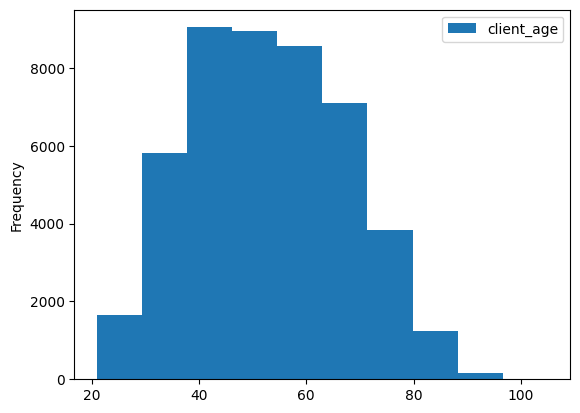

In [15]:
histogram_ = client_data[["client_age"]].plot(kind="hist")

In [16]:
calendar_data["month_name"].value_counts()

Month 2    31
Month 3    31
Month 5    31
Month 1    30
Month 4    30
Name: month_name, dtype: int64

In [17]:
df["deposit_date"].min(), df["deposit_date"].max()

('2019-06-01', '2019-10-31')

In [18]:
df["deposit_type"].value_counts()

Scheduled Deposit    247986
Actual Deposit       232408
Name: deposit_type, dtype: int64

In [19]:
df["deposit_cadence"].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

In [20]:
# convert the date column type to a datetime object
df["deposit_date"] = pd.to_datetime(df["deposit_date"])

In [21]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 7)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


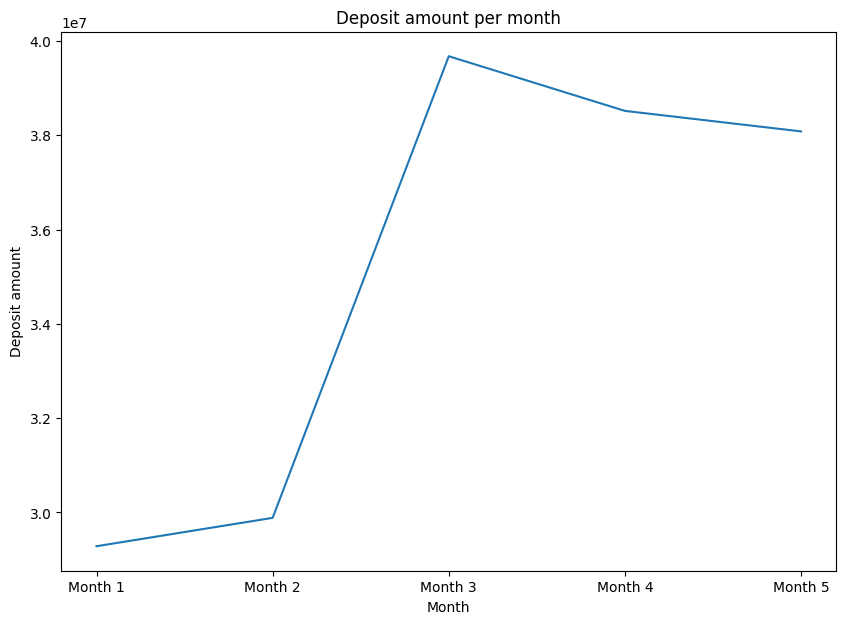

In [22]:
deposit_amount_by_month = df.groupby(by=df["month_name"])["deposit_amount"].sum()

print(deposit_amount_by_month)

_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount per month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

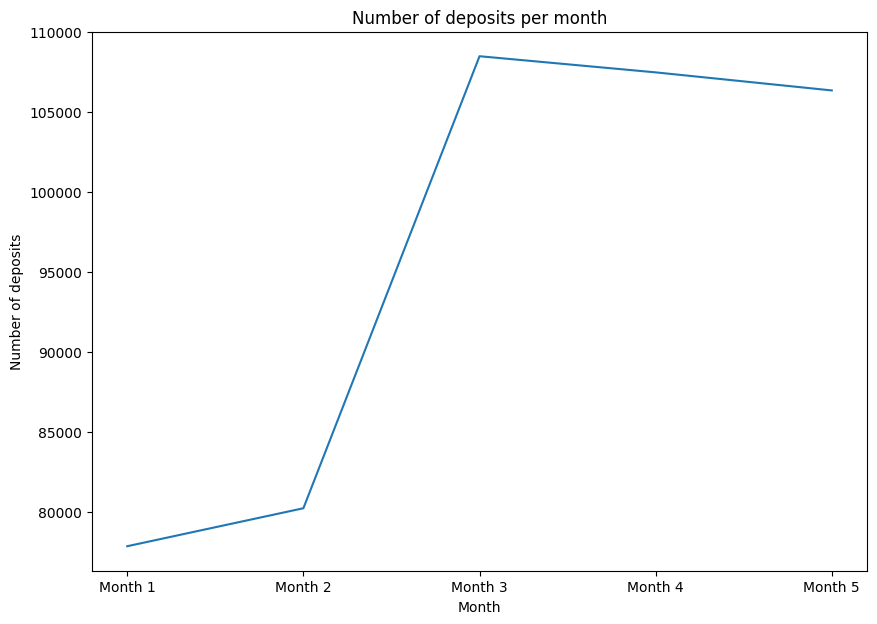

In [23]:
number_of_deposits_by_month = df.groupby(by=df["month_name"]).size()

_ = plt.plot(number_of_deposits_by_month)

_ = plt.title("Number of deposits per month")
_ = plt.ylabel("Number of deposits")
_ = plt.xlabel("Month")

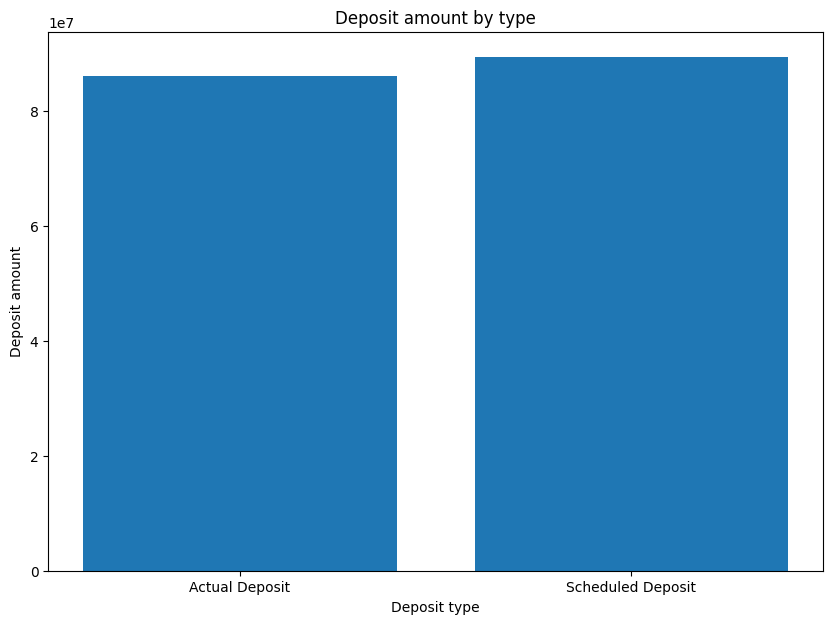

In [24]:
deposit_amount_by_type = df.groupby(by=df["deposit_type"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)

_ = plt.title("Deposit amount by type")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit type")

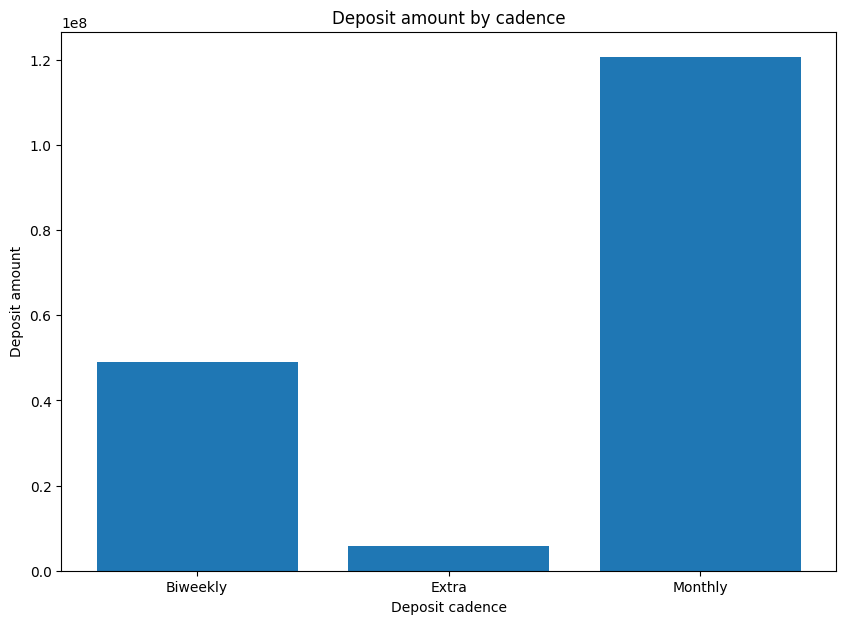

In [25]:
deposit_amount_by_cadence = df.groupby(by=df["deposit_cadence"])["deposit_amount"].sum()


_ = plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)

_ = plt.title("Deposit amount by cadence")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Deposit cadence")

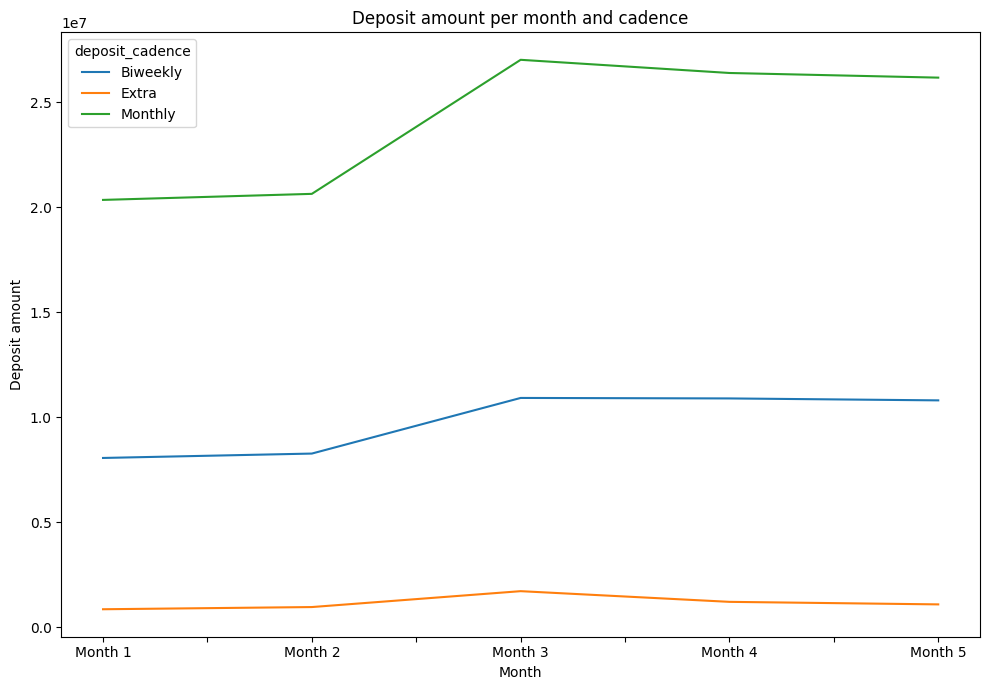

In [26]:
tmp_df = df.groupby(by=[df["deposit_cadence"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

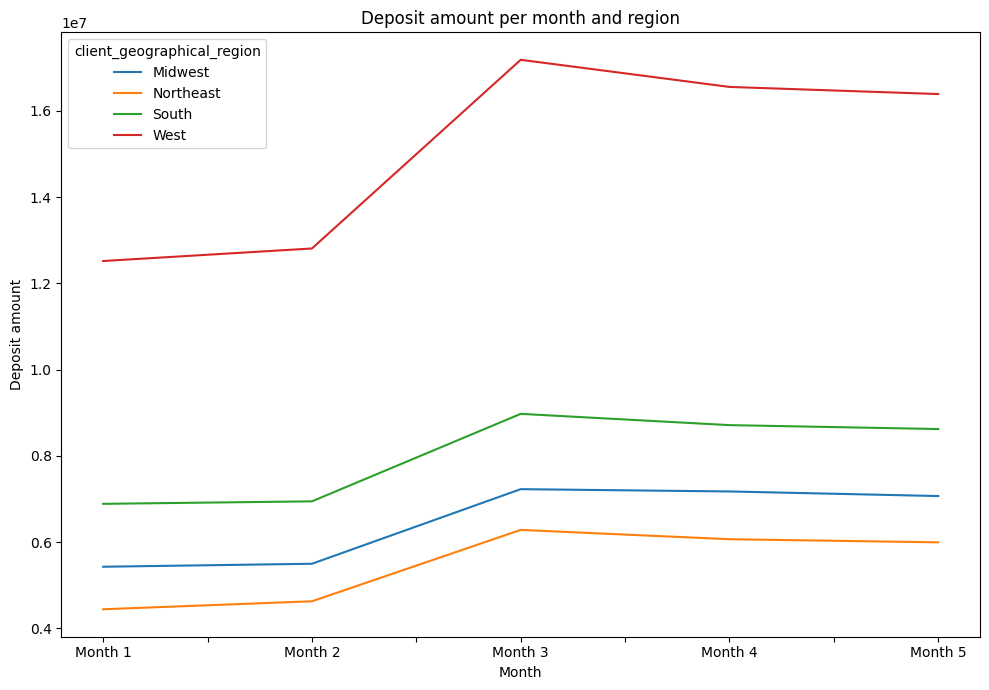

In [27]:
tmp_df = df.groupby(by=[df["client_geographical_region"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

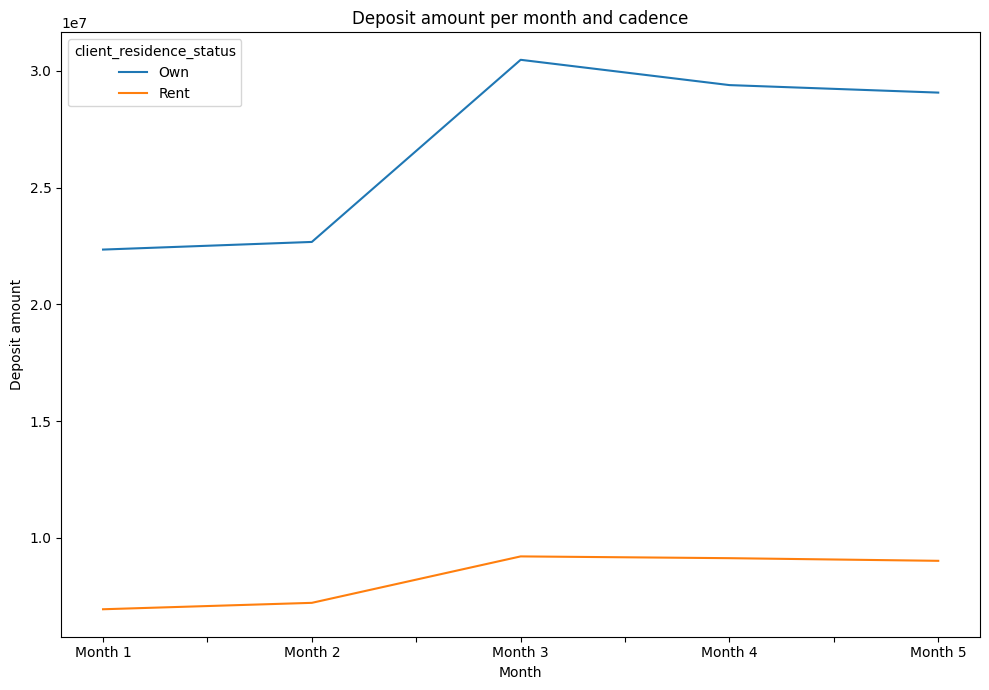

In [28]:
tmp_df = df.groupby(by=[df["client_residence_status"], df["month_name"]])["deposit_amount"].sum()

ax = tmp_df.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

In [29]:
clients_before_campaign = df[(df["month_name"] == "Month 1")
                           | (df["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [30]:
clients_after_campaign = df[(df["month_name"] == "Month 4")
                          | (df["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)